In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 29.5 MB 1.3 MB/s 


In [3]:
import pandas as pd
from rdkit import Chem

In [6]:
df = pd.read_csv ('/content/gdrive/MyDrive/git_projects/glass_transition/glass_transition/glass_transitiona1.csv')
df

,Amorphous Polymer,Tg_C
0,Poly(chlorotrifluoroethylene),87
1,"Poly(vinyl chloride), PVC",83
2,"Poly(vinyl fluoride), PVF",52
3,"Poly(vinylidene chloride), PVDC",-17
4,"Poly(vinylidene fluoride), PVDF",-34
...,...,...
217,Poly(vinyl methyl ketone),28
218,Poly(butyl vinyl thioether),-20
219,Poly(ethyl vinyl thioether),-7
220,Poly(methyl vinyl thioether),-1


## Find CasNo and SMILES

In [7]:
df['name_1'] = df['Amorphous Polymer'].str.strip('Poly()')
df

,Amorphous Polymer,Tg_C,name_1
0,Poly(chlorotrifluoroethylene),87,chlorotrifluoroethylene
1,"Poly(vinyl chloride), PVC",83,"vinyl chloride), PVC"
2,"Poly(vinyl fluoride), PVF",52,"vinyl fluoride), PVF"
3,"Poly(vinylidene chloride), PVDC",-17,"vinylidene chloride), PVDC"
4,"Poly(vinylidene fluoride), PVDF",-34,"vinylidene fluoride), PVDF"
...,...,...,...
217,Poly(vinyl methyl ketone),28,vinyl methyl ketone
218,Poly(butyl vinyl thioether),-20,butyl vinyl thioether
219,Poly(ethyl vinyl thioether),-7,ethyl vinyl thioether
220,Poly(methyl vinyl thioether),-1,methyl vinyl thioether


In [11]:
!pip install wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=54c321a86df5362374b9e45afdb5bc1a1f4cc24cc013dfdf496c32f4fe083dcb
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


In [ ]:
df.to_csv('glass_transition2.csv', index=False)

In [12]:
polymers = df['Amorphous Polymer']
polymers

0        Poly(chlorotrifluoroethylene)
1            Poly(vinyl chloride), PVC
2            Poly(vinyl fluoride), PVF
3      Poly(vinylidene chloride), PVDC
4      Poly(vinylidene fluoride), PVDF
                    ...               
217          Poly(vinyl methyl ketone)
218        Poly(butyl vinyl thioether)
219        Poly(ethyl vinyl thioether)
220       Poly(methyl vinyl thioether)
221         Poly(vinyl phenyl sulfide)
Name: Amorphous Polymer, Length: 222, dtype: object

In [13]:
polymers1 = polymers[0:10]
polymers1

0      Poly(chlorotrifluoroethylene)
1          Poly(vinyl chloride), PVC
2          Poly(vinyl fluoride), PVF
3    Poly(vinylidene chloride), PVDC
4    Poly(vinylidene fluoride), PVDF
5                       Teflon, PTFE
6          Polychloroprene, Neoprene
7                   Poly(acrylamide)
8       Poly(N,N-dimethylacrylamide)
9        Poly(2-cyanobutyl acrylate)
Name: Amorphous Polymer, dtype: object

In [14]:
import wikipedia
polymers_cas = []

In [23]:
url = wikipedia.page("Nylon 6").url
url

'https://en.wikipedia.org/wiki/Nylon'

In [21]:
for polymer in polymers1:
    try:
        url = wikipedia.page(polymer).url
        html = pd.read_html(url, header = 0)
        df3 = html[0]
        df3 = df3.fillna('0')
        df3.columns =['Name', 'values']
        df4 = df3.loc[df3.Name == 'CAS Number']
        print(df4.values[0][1])
        polymers_cas.append(df4.values[0][1])
    except:
        polymers_cas.append('0')
        print('0')

9002-83-9
0
0
9002-85-1
0
0
9010-98-4
9003-05-8
0
0


# Chemical structures using SMILES and rdkit

In [ ]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

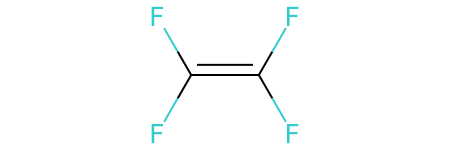

In [ ]:
mol = Chem.MolFromSmiles('FC(F)=C(F)F')
mol

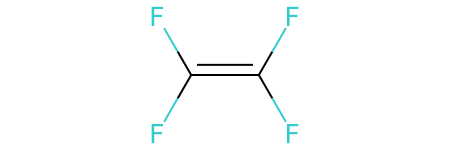

In [24]:
# from bkchem also correct F\C(\F)=C(\F)/F
mol = Chem.MolFromSmiles('F\C(\F)=C(\F)/F')
mol

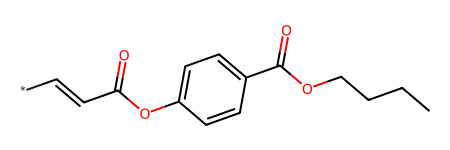

In [ ]:
mol = Chem.MolFromSmiles('*C=CC(=O)Oc1ccc(C(=O)OCCCC)cc1')
mol

In [4]:
import pandas as pd
df = pd.read_csv ('/content/gdrive/MyDrive/git_projects/glass_transition/glass_transition/glass_transition_b1.csv')
df

,Polymer Name,Smile,Tg_k
0,Poly(1-pentenylene),C1CC=CC1,178
1,Polycyclopentene,C1CC=CC1,178
2,Poly(tetramethylene glycol),C1CCCO1,189
3,Poly[oxy(hexyloxymethyl)ethylene],CCCCCCOCC1CO1,189
4,Poly(octyl vinyl ether),CCCCCCCCOC=C,193
...,...,...,...
347,"Poly(oxy-1,4-phenyleneoxy-1,4-phenylenesulfony...",Oc1ccc(cc1)O.Clc1ccc(cc1)S(=O)(=O)c1ccc(cc1)Cl,479
348,"Poly(oxy-1,4-biphenyleneoxy-1,4-phenylenesulfo...",Oc1ccc(cc1)c1ccc(cc1)O.Clc1ccc(cc1)S(=O)(=O)c1...,482
349,"Poly(oxy-1,4-phenylenesulfonyl-1,4-phenylene)",Clc1ccc(cc1)S(=O)(=O)c1ccc(cc1)Cl.Oc1ccc(cc1)S...,489
350,"Poly(2,6,3',5'-tetrachloro bisphenol A carbonate)",CC(c1cc(Cl)c(c(c1)Cl)O)(c1cc(Cl)c(c(c1)Cl)O)C....,500


## Finding molecular weight

In [5]:
from rdkit.Chem.Descriptors import ExactMolWt
ExactMolWt(Chem.MolFromSmiles('C=CC(=O)Oc1ccc(CCCOC)cc1'))

220.109944372

In [59]:
#list1 = df['Smile'].tolist()
list1[:10]

['C1CC=CC1',
 'C1CC=CC1',
 'C1CCCO1',
 'CCCCCCOCC1CO1',
 'CCCCCCCCOC=C',
 'CCCCOCC1CO1',
 'C1CCO1',
 'CCC=CC=C',
 'CCC=CC=C',
 'C=CC(=O)Oc1ccc(CCCOC)cc1']

In [29]:
list2 = list1[0:10]

In [30]:
list3 = []
for name in list1:
    try:
        mw = ExactMolWt(Chem.MolFromSmiles(name))
        list3.append(mw)
    except:
        print(name)

In [32]:
df['Molecular_weight'] = list3
df

,Polymer Name,Smile,Tg_k,Molecular_weight
0,Poly(1-pentenylene),C1CC=CC1,178,68.062600
1,Polycyclopentene,C1CC=CC1,178,68.062600
2,Poly(tetramethylene glycol),C1CCCO1,189,72.057515
3,Poly[oxy(hexyloxymethyl)ethylene],CCCCCCOCC1CO1,189,158.130680
4,Poly(octyl vinyl ether),CCCCCCCCOC=C,193,156.151415
...,...,...,...,...
347,"Poly(oxy-1,4-phenyleneoxy-1,4-phenylenesulfony...",Oc1ccc(cc1)O.Clc1ccc(cc1)S(=O)(=O)c1ccc(cc1)Cl,479,395.998985
348,"Poly(oxy-1,4-biphenyleneoxy-1,4-phenylenesulfo...",Oc1ccc(cc1)c1ccc(cc1)O.Clc1ccc(cc1)S(=O)(=O)c1...,482,472.030285
349,"Poly(oxy-1,4-phenylenesulfonyl-1,4-phenylene)",Clc1ccc(cc1)S(=O)(=O)c1ccc(cc1)Cl.Oc1ccc(cc1)S...,489,535.992186
350,"Poly(2,6,3',5'-tetrachloro bisphenol A carbonate)",CC(c1cc(Cl)c(c(c1)Cl)O)(c1cc(Cl)c(c(c1)Cl)O)C....,500,461.891760


## Morgan Fingerprint

In [6]:
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem import Draw
import numpy as np
from rdkit import Chem

In [42]:
morgan_ref = AllChem.GetMorganFingerprintAsBitVect((Chem.MolFromSmiles('CC')),3, nBits=1024)
morgan_arr_r = np.zeros((1,))
DataStructs.ConvertToNumpyArray(morgan_ref, morgan_arr_r)
print(morgan_arr_r.shape)
morgan_arr2 = np.nonzero(morgan_arr_r)
print(morgan_arr2)

(1024,)
(array([ 33, 251]),)


In [45]:
morgan_ref = AllChem.GetMorganFingerprintAsBitVect((Chem.MolFromSmiles('[*]CC[*]')),3, nBits=1024)
morgan_arr_r = np.zeros((1,))
DataStructs.ConvertToNumpyArray(morgan_ref, morgan_arr_r)
print(morgan_arr_r.shape)
morgan_arr2 = np.nonzero(morgan_arr_r)
print(morgan_arr2)

(1024,)
(array([ 80,  93, 226, 247, 757]),)


In [46]:
#morgan finger print

morganlist = []
for name in list1:
    try:
        #morgan = ExactMolWt(Chem.MolFromSmiles(name))
        #morgan = AllChem.GetMorganFingerprintAsBitVect((Chem.MolFromSmiles(name)),2, nBits=1024)
        morgan = AllChem.GetMorganFingerprintAsBitVect((Chem.MolFromSmiles(name)),2, nBits=1024)
        morgan_arr = np.zeros((1,))
        DataStructs.ConvertToNumpyArray(morgan, morgan_arr)
        #print(morgan_arr.shape)
        #morgan_arr2 = np.nonzero(morgan_arr)
        morganlist.append(morgan_arr)
    except:
        print(name)

In [47]:
morganlist[1]

array([0., 0., 0., ..., 0., 0., 0.])

In [49]:
df_morgan = pd.DataFrame(morganlist)
df_morgan

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
y = df['Tg_k']
y

0      178
1      178
2      189
3      189
4      193
      ... 
347    479
348    482
349    489
350    500
351    538
Name: Tg_k, Length: 352, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_morgan, y, test_size=0.2, random_state=32)

## Random forest model

In [52]:
from sklearn.ensemble import RandomForestRegressor
forest_reg2 = RandomForestRegressor()
forest_reg2.fit(X_train, y_train)

RandomForestRegressor()

In [53]:
forest_reg2.score(X_train, y_train)

0.9677471049266928

In [54]:
y_predict = forest_reg2.predict(X_test)

In [55]:
#import numpy as np
from sklearn.metrics import mean_squared_error
#rubber_predictions_test4 = reg_mod_bay.predict(rubber2_test_comp_tr)
forest_mse4 = mean_squared_error(y_predict, y_test)
forest_rmse4 = np.sqrt(forest_mse4)
#print(rubber_predictions_test4)
forest_rmse4

36.43778407264053

In [60]:
#saving and loading model
import pickle
filename = '/content/gdrive/MyDrive/git_projects/glass_transition/glass_transition/rf_glass_transition_model2.sav'
pickle.dump(forest_reg2, open(filename, 'wb'))

In [58]:
import pickle
filename = 'rf_glass_transition_model2.sav'
forest_reg2 = pickle.load(open(filename, 'rb'))

## Additional descriptors

In [61]:
df

,Polymer Name,Smile,Tg_k,Molecular_weight
0,Poly(1-pentenylene),C1CC=CC1,178,68.062600
1,Polycyclopentene,C1CC=CC1,178,68.062600
2,Poly(tetramethylene glycol),C1CCCO1,189,72.057515
3,Poly[oxy(hexyloxymethyl)ethylene],CCCCCCOCC1CO1,189,158.130680
4,Poly(octyl vinyl ether),CCCCCCCCOC=C,193,156.151415
...,...,...,...,...
347,"Poly(oxy-1,4-phenyleneoxy-1,4-phenylenesulfony...",Oc1ccc(cc1)O.Clc1ccc(cc1)S(=O)(=O)c1ccc(cc1)Cl,479,395.998985
348,"Poly(oxy-1,4-biphenyleneoxy-1,4-phenylenesulfo...",Oc1ccc(cc1)c1ccc(cc1)O.Clc1ccc(cc1)S(=O)(=O)c1...,482,472.030285
349,"Poly(oxy-1,4-phenylenesulfonyl-1,4-phenylene)",Clc1ccc(cc1)S(=O)(=O)c1ccc(cc1)Cl.Oc1ccc(cc1)S...,489,535.992186
350,"Poly(2,6,3',5'-tetrachloro bisphenol A carbonate)",CC(c1cc(Cl)c(c(c1)Cl)O)(c1cc(Cl)c(c(c1)Cl)O)C....,500,461.891760


In [63]:
#Feature engineering
df["C_Atoms_Ring"]=df["Smile"].apply(lambda x: x.count('c'))
df["C_Atoms_Chain"]=df["Smile"].apply(lambda x: x.count('C'))
df["O_Atoms_Chain"]=df["Smile"].apply(lambda x: x.count('O'))
df["O_Atoms_Ring"]=df["Smile"].apply(lambda x: x.count('o'))
#df["N_Double Bonds_Ring"]=df["Smile"].apply(lambda x: x.count('c')/2)
df["N_Double Bonds_Chain"]=df["Smile"].apply(lambda x: x.count('='))
df["Nitrogen_Atoms"]=df["Smile"].apply(lambda x: x.count('N'))
df["F_Atoms"]=df["Smile"].apply(lambda x: x.count('F'))
#df["MW"]=df["Smile"].apply(lambda x: Molecular_Weight(x))
#df["Total Number of Atoms"]=df["Smile"].apply(lambda x: len(x))
#df["Number of Double Bonds"]=df["Smile"].apply(lambda x:len(x)-x.count('=')-1)
df["Number of Triple Bonds"]=df["Smile"].apply(lambda x: x.count("#"))
df["Branching"]=df["Smile"].apply(lambda x: (x.count("(")+x.count(")"))/2)
df["Chlorine_Atoms"]=df["Smile"].apply(lambda x: x.count('Cl'))
df["Bromine_Atoms"]=df["Smile"].apply(lambda x: x.count('Br'))
df["Sulphur_Atoms"]=df["Smile"].apply(lambda x: x.count('S'))
df["Two_Structures"]=df["Smile"].apply(lambda x: x.count('.'))
#df["If_Aromatic"]=df["Smile"].apply(lambda x: 1 if 'c' in x else 0)
df["No_of_Branched_C"]=df["Smile"].apply(lambda x: x.count('(C)'))
df["No_of_Branched_F"]=df["Smile"].apply(lambda x: x.count('(F)'))
df["No_of_Branched_Cl"]=df["Smile"].apply(lambda x: x.count('(Cl)'))
df["No_of_Branched_Br"]=df["Smile"].apply(lambda x: x.count('(Br)'))
df["No_of_Branched_=O"]=df["Smile"].apply(lambda x: x.count('(=O)'))
df["Number_of_C=C"]=df["Smile"].apply(lambda x: x.count('C=C')+x.count('cc'))
df["Number_of_C-C"]=df["Smile"].apply(lambda x: x.count('CC'))
#df["Benze_Ring"]=df["Smile"].apply(lambda x: x.count('c1ccccc1'))
#df["Benze_Ring_var"]=df["Smile"].apply(lambda x: x.count('c1cc'))
#df["Benze_Ring_varr"]=df["Smile"].apply(lambda x: x.count('cc1'))
df["n_atoms"]=df["Smile"].map(lambda x: Chem.MolFromSmiles(x).GetNumAtoms())
df

,Polymer Name,Smile,Tg_k,Molecular_weight,C_Atoms_Ring,C_Atoms_Chain,O_Atoms_Chain,O_Atoms_Ring,N_Double Bonds_Chain,Nitrogen_Atoms,...,Sulphur_Atoms,Two_Structures,No_of_Branched_C,No_of_Branched_F,No_of_Branched_Cl,No_of_Branched_Br,No_of_Branched_=O,Number_of_C=C,Number_of_C-C,n_atoms
0,Poly(1-pentenylene),C1CC=CC1,178,68.062600,0,5,0,0,1,0,...,0,0,0,0,0,0,0,1,2,5
1,Polycyclopentene,C1CC=CC1,178,68.062600,0,5,0,0,1,0,...,0,0,0,0,0,0,0,1,2,5
2,Poly(tetramethylene glycol),C1CCCO1,189,72.057515,0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,1,5
3,Poly[oxy(hexyloxymethyl)ethylene],CCCCCCOCC1CO1,189,158.130680,0,9,2,0,0,0,...,0,0,0,0,0,0,0,0,4,11
4,Poly(octyl vinyl ether),CCCCCCCCOC=C,193,156.151415,0,10,1,0,1,0,...,0,0,0,0,0,0,0,1,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,"Poly(oxy-1,4-phenyleneoxy-1,4-phenylenesulfony...",Oc1ccc(cc1)O.Clc1ccc(cc1)S(=O)(=O)c1ccc(cc1)Cl,479,395.998985,18,2,4,0,2,0,...,1,1,0,0,0,0,2,6,0,25
348,"Poly(oxy-1,4-biphenyleneoxy-1,4-phenylenesulfo...",Oc1ccc(cc1)c1ccc(cc1)O.Clc1ccc(cc1)S(=O)(=O)c1...,482,472.030285,24,2,4,0,2,0,...,1,1,0,0,0,0,2,8,0,31
349,"Poly(oxy-1,4-phenylenesulfonyl-1,4-phenylene)",Clc1ccc(cc1)S(=O)(=O)c1ccc(cc1)Cl.Oc1ccc(cc1)S...,489,535.992186,24,2,6,0,4,0,...,2,1,0,0,0,0,4,8,0,34
350,"Poly(2,6,3',5'-tetrachloro bisphenol A carbonate)",CC(c1cc(Cl)c(c(c1)Cl)O)(c1cc(Cl)c(c(c1)Cl)O)C....,500,461.891760,12,10,3,0,1,0,...,0,1,0,0,2,0,1,2,1,25


In [66]:
X = df.drop([' Polymer Name','Smile', 'Tg_k' ], axis='columns')
X

,Molecular_weight,C_Atoms_Ring,C_Atoms_Chain,O_Atoms_Chain,O_Atoms_Ring,N_Double Bonds_Chain,Nitrogen_Atoms,F_Atoms,Number of Triple Bonds,Branching,...,Sulphur_Atoms,Two_Structures,No_of_Branched_C,No_of_Branched_F,No_of_Branched_Cl,No_of_Branched_Br,No_of_Branched_=O,Number_of_C=C,Number_of_C-C,n_atoms
0,68.062600,0,5,0,0,1,0,0,0,0.0,...,0,0,0,0,0,0,0,1,2,5
1,68.062600,0,5,0,0,1,0,0,0,0.0,...,0,0,0,0,0,0,0,1,2,5
2,72.057515,0,4,1,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,1,5
3,158.130680,0,9,2,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,4,11
4,156.151415,0,10,1,0,1,0,0,0,0.0,...,0,0,0,0,0,0,0,1,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,395.998985,18,2,4,0,2,0,0,0,5.0,...,1,1,0,0,0,0,2,6,0,25
348,472.030285,24,2,4,0,2,0,0,0,6.0,...,1,1,0,0,0,0,2,8,0,31
349,535.992186,24,2,6,0,4,0,0,0,8.0,...,2,1,0,0,0,0,4,8,0,34
350,461.891760,12,10,3,0,1,0,0,0,9.0,...,0,1,0,0,2,0,1,2,1,25


In [67]:
y = df['Tg_k']

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [69]:
from sklearn.ensemble import RandomForestRegressor
forest_reg2 = RandomForestRegressor()
forest_reg2.fit(X_train, y_train)

RandomForestRegressor()

In [70]:
forest_reg2.score(X_train, y_train)

0.9791250567028308

In [71]:
y_predict = forest_reg2.predict(X_test)

In [72]:
#import numpy as np
from sklearn.metrics import mean_squared_error
#rubber_predictions_test4 = reg_mod_bay.predict(rubber2_test_comp_tr)
forest_mse4 = mean_squared_error(y_predict, y_test)
forest_rmse4 = np.sqrt(forest_mse4)
#print(rubber_predictions_test4)
forest_rmse4

28.676734827428117

In [73]:
forest_reg2.feature_importances_

array([7.14102975e-02, 4.27339187e-01, 4.50016719e-02, 3.76494957e-02,
       0.00000000e+00, 1.40968876e-02, 1.41571594e-01, 1.55422047e-03,
       1.47326251e-03, 6.39050249e-02, 1.27083748e-02, 7.23855206e-03,
       3.19733038e-05, 1.67447116e-03, 1.03162026e-02, 7.29086574e-04,
       5.80210183e-05, 0.00000000e+00, 5.61932970e-03, 1.46562115e-02,
       9.14079377e-02, 5.15581983e-02])

In [78]:
import matplotlib.pyplot as plt

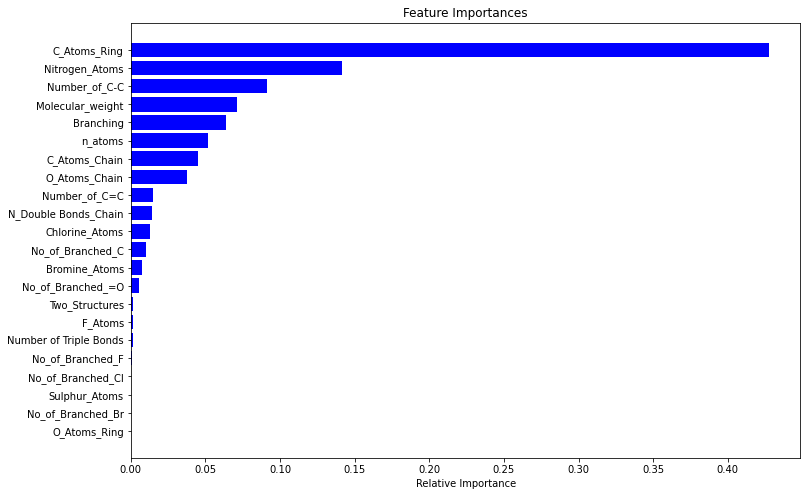

In [82]:
features = X_train.columns
#features = X['feature_names']
importances = forest_reg2.feature_importances_

indices = np.argsort(importances)
plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [94]:
indices

array([ 4, 17, 12, 16, 15,  8,  7, 13, 18, 11, 14, 10,  5, 19,  3,  2, 21,
        9,  0, 20,  6,  1])

In [83]:
#saving and loading model
import pickle
filename = '/content/gdrive/MyDrive/git_projects/glass_transition/glass_transition/rf_gt_additional_features_only.sav'
pickle.dump(forest_reg2, open(filename, 'wb'))

## Additional descriptors and Morgan finger prints

In [88]:
df_morgan_comb = pd.concat([X, df_morgan], axis=1)
df_morgan_comb                  

,Molecular_weight,C_Atoms_Ring,C_Atoms_Chain,O_Atoms_Chain,O_Atoms_Ring,N_Double Bonds_Chain,Nitrogen_Atoms,F_Atoms,Number of Triple Bonds,Branching,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,68.062600,0,5,0,0,1,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,68.062600,0,5,0,0,1,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,72.057515,0,4,1,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,158.130680,0,9,2,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,156.151415,0,10,1,0,1,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,395.998985,18,2,4,0,2,0,0,0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
348,472.030285,24,2,4,0,2,0,0,0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
349,535.992186,24,2,6,0,4,0,0,0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
350,461.891760,12,10,3,0,1,0,0,0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y = df['Tg_k']

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_morgan_comb, y, test_size=0.2, random_state=32)

In [90]:
from sklearn.ensemble import RandomForestRegressor
forest_reg2 = RandomForestRegressor()
forest_reg2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


RandomForestRegressor()

In [97]:
X_train

,Molecular_weight,C_Atoms_Ring,C_Atoms_Chain,O_Atoms_Chain,O_Atoms_Ring,N_Double Bonds_Chain,Nitrogen_Atoms,F_Atoms,Number of Triple Bonds,Branching,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
195,162.068080,6,4,2,0,2,0,0,0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,64.012457,0,2,0,0,1,0,2,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
28,30.010565,0,1,1,0,1,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
257,204.115030,6,7,2,0,2,0,0,0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111,204.020971,0,6,2,0,2,0,5,0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,162.104465,6,5,1,0,1,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88,210.050379,0,8,3,0,3,0,3,0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
310,224.120115,12,4,1,0,1,0,0,0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43,158.094294,0,8,3,0,2,0,0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
forest_reg2.score(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.9807271117267542

In [92]:
y_predict = forest_reg2.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [93]:
#import numpy as np
from sklearn.metrics import mean_squared_error
#rubber_predictions_test4 = reg_mod_bay.predict(rubber2_test_comp_tr)
forest_mse4 = mean_squared_error(y_predict, y_test)
forest_rmse4 = np.sqrt(forest_mse4)
#print(rubber_predictions_test4)
forest_rmse4

27.815838363061868

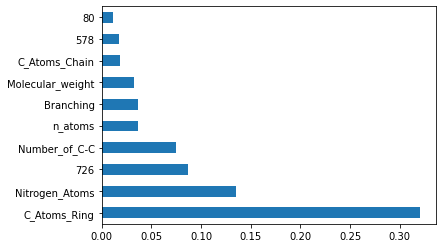

In [100]:
feat_importances = pd.Series(forest_reg2.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [96]:
indices

array([1045,  561,  564,  565,  566,  568,  570,  571,  573,  559])

In [101]:
#saving and loading model
import pickle
filename = '/content/gdrive/MyDrive/git_projects/glass_transition/glass_transition/rf_gt_additional_features_morgan.sav'
pickle.dump(forest_reg2, open(filename, 'wb'))